# Import required Packages

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import operator
import seaborn as sns
sns.set()
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

## Created results function to compute  mean square error of training and testing of each model


In [85]:
def resultss(method, model,X_train, X_test, y_train, y_test):
    y_fitted = model.predict(X_train)
    error_mse_f = round(mean_squared_error(y_train, y_fitted))
    error_mae_f = round(mean_absolute_error(y_train, y_fitted))
    if len(X_test)>0:
        y_pred = model.predict(X_test)
        error_mse_p = round(mean_squared_error(y_test, y_pred))
        error_mae_p = round(mean_absolute_error(y_test, y_pred))
    else:
        error_mse_p=np.nan
        error_mae_p=np.nan        
    return(method,error_mse_f,error_mae_f,error_mse_p,error_mae_p,len(X_train))

# 1. Linear Regression 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [88]:
def LR(X_train, X_test, y_train, y_test):
    try:
        model_LR= LinearRegression() 
        model_LR.fit(X_train, y_train) 
        results_LR= resultss("LR",model_LR,X_train, X_test, y_train, y_test )
        return(results_LR)
    except:
        return("LR",np.nan, np.nan,np.nan, np.nan,len(X_train))

# 2. Polynomial Regression
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [89]:
def Poly(x,y,degree_):

    try:
        np.random.seed(0)
    # transforming the data to include another axis
        polynomial_features= PolynomialFeatures(degree=degree_)
        x_poly = polynomial_features.fit_transform(x)
        n=uservalue
        X_train, X_test=  x_poly[0:len(x_poly)-n], x_poly[len(x_poly)-n:]
        y_train, y_test=  y[0:len(x_poly)-n], y[len(x_poly)-n:]
        normalizer = preprocessing.Normalizer().fit(x_poly)
        X_train, X_test=  normalizer.transform(X_train), normalizer.transform(X_test)
        model_Poly = LinearRegression()
        model_Poly.fit(X_train, y_train)
        results_Poly= resultss("poly",model_Poly,X_train, X_test, y_train, y_test)
        return(results_Poly)
    except:
        return("poly",np.nan, np.nan,np.nan, np.nan,len(x)-3)

# 3. Quantile Regression 
https://www.statsmodels.org/stable/generated/statsmodels.regression.quantile_regression.QuantReg.html

In [90]:
def Quantile(X_train, X_test, y_train, y_test):
    from statsmodels.regression.quantile_regression import QuantReg
    try:
        model_quantile = QuantReg(y_train,X_train)
        model_quantile = model_quantile.fit(q=.5)
        results_QT= resultss("Quantile",model_quantile,X_train, X_test, y_train, y_test )
        return(results_QT)
    except:
        return("Quantile",np.nan, np.nan,np.nan, np.nan,len(X_train))

# 4. Ridge Regression 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [91]:
def Ridge(X_train, X_test, y_train, y_test):
    from sklearn.linear_model import Ridge
    try:
        model_Ridge = Ridge(alpha=1.0)
        model_Ridge.fit(X_train, y_train) 
        results_Ridge= resultss("Ridge",model_Ridge,X_train, X_test, y_train, y_test )
        return(results_Ridge)
    except:
        return("Ridge",np.nan, np.nan,np.nan, np.nan,len(X_train))

# 5. Lassos Regression 
Lasso stands for Least Absolute Shrinkage and Selection Operator. It makes use of L1 regularization technique in the objective function.
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [93]:
def Lasso(X_train, X_test, y_train, y_test):
    from sklearn import linear_model
    try:
        model_Lasso = linear_model.Lasso(alpha=0.1)
        model_Lasso.fit(X_train, y_train)
        results_Lasso= resultss("Lasso",model_Lasso,X_train, X_test, y_train, y_test )
        return(results_Lasso)
    except:
        return("Lasso",np.nan, np.nan,np.nan, np.nan,len(X_train))

# 6. Elastic Net Regression
Elastic Net regression is preferred over both ridge and lasso regression when one is dealing with highly correlated independent variables.
It is a combination of both L1 and L2 regularization.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

In [94]:
def ENR(X_train, X_test, y_train, y_test):
    from sklearn.linear_model import ElasticNet
    try:
        model_ENR = ElasticNet(random_state=0)
        model_ENR.fit(X_train, y_train)
        results_ENR= resultss("ENR",model_ENR,X_train, X_test, y_train, y_test )
        return(results_ENR)
    except:
        return("ENR",np.nan, np.nan,np.nan, np.nan,len(X_train))

# 7. Principal Components Regression (PCR)

reduce the number of variables that are effectively used to describe the data

https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html

In [95]:
def PCR(x, y):
    from sklearn.decomposition import PCA
    from sklearn import linear_model
    try:
        pca = PCA(n_components=10, svd_solver='arpack')
        pca.fit(x)
        Xreg = pca.fit_transform(x)
        n=uservalue
        X_train, X_test=  Xreg.iloc[0:len(Xreg)-n,:], Xreg.iloc[len(Xreg)-n:,]
        y_train, y_test=  y.iloc[0:len(y)-n], y.iloc[len(y)-n:]
        normalizer = preprocessing.Normalizer().fit(Xreg)
        X_train, X_test=  normalizer.transform(X_train), normalizer.transform(X_test)

        model_PCR = LinearRegression()
        model_PCR.fit(X_train, y_train)
        results_PCR= resultss("PCR",model_PCR,X_train, X_test, y_train, y_test )
        return(results_PCR)
    except:
        return("PCR",np.nan, np.nan,np.nan, np.nan,len(x)-3)

# 8. Partial Least Squares (PLS) Regression

It is an alternative technique of principal component regression when you have independent variables highly correlated. It is also useful when there are a large number of independent variables.
https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html

In [96]:
def PLS(X_train, X_test, y_train, y_test):
    from sklearn.cross_decomposition import PLSRegression
    try:
        model_PLS = PLSRegression(n_components=2)
        model_PLS.fit(X_train, y_train)
        results_PLS= resultss("PLS",model_PLS,X_train, X_test, y_train, y_test )
        return(results_PLS)
    except:
        return("PLS",np.nan, np.nan,np.nan, np.nan,len(X_train))

# 9. Support Vector Regression
https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#

In [97]:
def SVR(X_train, X_test, y_train, y_test):
    from sklearn import svm
    try:
        model_SVR = svm.SVR()
        model_SVR.fit(X_train, y_train)
        results_SVR= resultss("SVR",model_SVR,X_train, X_test, y_train, y_test )
        return(results_SVR)
    except:
        return("PLS",np.nan, np.nan,np.nan, np.nan,len(X_train))

# 10. Decision Tree Regression

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [99]:
def DT(X_train, X_test, y_train, y_test):
    from sklearn.tree import DecisionTreeRegressor

    try:
        model = DecisionTreeRegressor(max_depth=5)
        model.fit(X_train, y_train)
        results= resultss("DT",model,X_train, X_test, y_train, y_test )
        return(results)
    except:
        return("DT",np.nan, np.nan,np.nan, np.nan,len(X_train))

# 11. Random Forest 
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [100]:
def RF(X_train, X_test, y_train, y_test):
    from sklearn.ensemble import RandomForestRegressor

    try:
        model = RandomForestRegressor(max_depth=5, random_state=0)
        model.fit(X_train, y_train)
        results= resultss("RF",model,X_train, X_test, y_train, y_test )
        return(results)
    except:
        return("RF",np.nan, np.nan,np.nan, np.nan,len(X_train))

# 12. Gradient Boost Regression 
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

In [101]:
def GBR(X_train, X_test, y_train, y_test):
    from sklearn.ensemble import GradientBoostingRegressor

    try:
        model = GradientBoostingRegressor(random_state=0)
        model.fit(X_train, y_train)
        results= resultss("GBR",model,X_train, X_test, y_train, y_test )
        return(results)
    except:
        return("GBR",np.nan, np.nan,np.nan, np.nan,len(X_train))

# Load Data (only .xlsx file format)

Here cardeko data was to predict the price of vehicle 

https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

In [70]:
import easygui as eg
path = eg.fileopenbox()
df = pd.read_csv (path)
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


# Select Y variable (Target variable)

In [71]:
choices=df.columns.values
title='List of columns'
#selection=eg.multchoicebox('Choose Column Names',title,choices,preselect=2)

selection_for_Target_Variable =eg.choicebox('Choose Column Names for y-axis(Target Variable)',title,choices)
print(selection_for_Target_Variable)


[0]
Selling_Price


# Plot Trend 

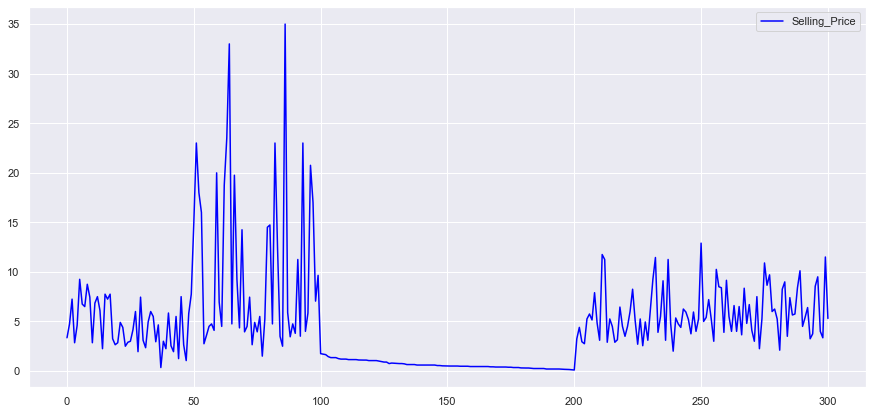

In [72]:
ts = df[selection_for_Target_Variable]
plt.figure(figsize=(15,7))
plt.plot(df[selection_for_Target_Variable], label="Selling_Price", color= 'Blue')
plt.legend(loc=1)

In [73]:
size_df=len(df)
uservalue = eg.integerbox(msg='Total size of data'+str(size_df)+',How many records you want to split to test data', lowerbound = 0, upperbound=(len(df)/2))
uservalue

60

In [74]:
# Summary of Data 
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [75]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [76]:
# Encoding to convert object to catagorical 

In [78]:
from sklearn.preprocessing import LabelEncoder
ord_enc = LabelEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        print("converting column: " , i)
        df[i] = ord_enc.fit_transform(df[i])
df.dtypes

converting column:  Car_Name
converting column:  Fuel_Type
converting column:  Seller_Type
converting column:  Transmission


Car_Name           int32
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type          int32
Seller_Type        int32
Transmission       int32
Owner              int64
dtype: object

# Pearson Coeff Plot

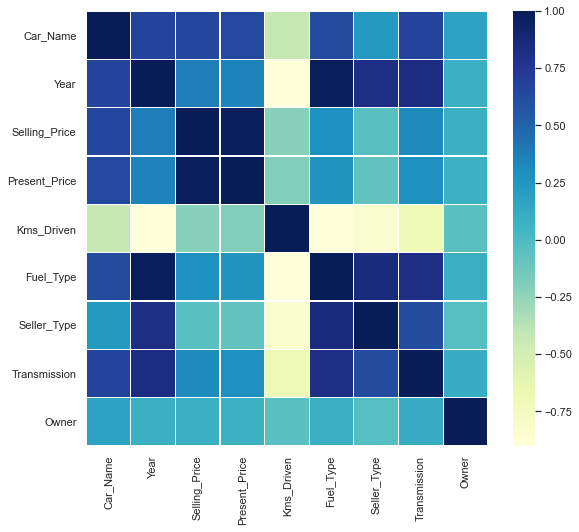

In [79]:
normalizer = preprocessing.Normalizer().fit(df.dropna())
df_NOR = normalizer.transform(df.dropna())
df_NOR = pd.DataFrame(df_NOR)
df_NOR.columns = df.columns
df_NOR.head()
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm 
corrmat = df_NOR.corr() 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

In [80]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [103]:
fitted_list=[]
y= df[selection_for_Target_Variable]
x= df.drop(selection_for_Target_Variable, axis=1)
normalizer = preprocessing.Normalizer().fit(x)
x=normalizer.transform(x)
n=uservalue
X_train, X_test=  x[0:len(x)-n:], x[len(x)-n:]
y_train, y_test=  y.iloc[0:len(y)-n], y.iloc[len(y)-n:]
min_max_scaler = preprocessing.MinMaxScaler()
fitted_list.append(LR(X_train, X_test, y_train, y_test))
fitted_list.append(Poly(x, y, 3))
fitted_list.append(Quantile(X_train, X_test, y_train, y_test))
fitted_list.append(Ridge(X_train, X_test, y_train, y_test))
fitted_list.append(Lasso(X_train, X_test, y_train, y_test))
fitted_list.append(ENR(X_train, X_test, y_train, y_test))
fitted_list.append(PCR(x, y))
fitted_list.append(SVR(X_train, X_test, y_train, y_test))
fitted_list.append(PLS(X_train, X_test, y_train, y_test))
fitted_list.append(DT(X_train, X_test, y_train, y_test))
fitted_list.append(RF(X_train, X_test, y_train, y_test))
fitted_list.append(GBR(X_train, X_test, y_train, y_test))

In [108]:
result_table=pd.DataFrame(fitted_list)
result_table.columns=['Method','error_mse_f', 'error_mae_f', 'error_mse_p', 'error_mae_p',"Train Length" ]
result_table['% Diff Fitting and Predcition MAE'] = round(((abs(result_table['error_mae_f']-result_table['error_mae_p'])*100)/result_table['error_mae_f']),1)
result_table=result_table[~(result_table['% Diff Fitting and Predcition MAE']==np.inf)]
result_table=result_table[~(result_table['error_mae_f']==0)]

In [109]:
result_table = result_table.sort_values(by=['error_mae_f'], ascending=True).reset_index(drop=True).head(20)

In [110]:
result_table

,Method,error_mse_f,error_mae_f,error_mse_p,error_mae_p,Train Length,% Diff Fitting and Predcition MAE
0,DT,2.0,1.0,4.0,2.0,241,100.0
1,RF,2.0,1.0,3.0,1.0,241,0.0
2,LR,12.0,2.0,4.0,1.0,241,50.0
3,Quantile,22.0,2.0,8.0,2.0,241,0.0
4,PLS,15.0,2.0,6.0,2.0,241,0.0
5,SVR,32.0,3.0,17.0,3.0,241,0.0
6,Ridge,29.0,4.0,9.0,2.0,241,50.0
7,Lasso,30.0,4.0,9.0,2.0,241,50.0
8,ENR,30.0,4.0,9.0,2.0,241,50.0
9,PCR,NaN,NaN,NaN,NaN,298,NaN


## Out of all regression methods DT has lowet fitting error but prediction error is higher 
## hence Random forecast regression is best regression for predicting Selling price 